<a href="https://colab.research.google.com/github/Emirat17/Bayesian/blob/main/covid_forecasting_montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IN THIS KERNEL, I WILL TRY TO EXAMINE COVID TIME DAY AND DO SOME MODELLING**

---

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files

from google.colab import files
uploaded = files.upload()

Saving data_covid.xlsx to data_covid.xlsx


In [29]:
import io
data = pd.read_excel(io.BytesIO(uploaded['data_covid.xlsx']))

In [30]:
data.head()

,Tanggal,PROBABLE,SUSPEK,POSITIF,SEMBUH,MENINGGAL
0,2020-09-02 00:00:00,42,243,518,4967,630
1,2020-09-03 00:00:00,39,404,519,5077,636
2,2020-09-04 00:00:00,46,441,482,5198,640
3,2020-09-05 00:00:00,51,486,460,5325,644
4,2020-09-06 00:00:00,58,465,483,5402,648


In [31]:
data.tail()

,Tanggal,PROBABLE,SUSPEK,POSITIF,SEMBUH,MENINGGAL
262,2021-05-22 00:00:00,20,59,398,34328,2881
263,2021-05-23 00:00:00,24,56,385,34433,2886
264,2021-05-24 00:00:00,31,70,358,34480,2894
265,2021-05-25 00:00:00,23,95,392,34594,2900
266,2021-05-26 00:00:00,22,83,401,34692,2906


Let's first use monte carlo simulation for forecasting 

1. Prediksi Jumlah Kasus "POSITIF"

In [32]:
from scipy.stats import norm
log_returns = np.log(1 + data.POSITIF.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return

t_intervals = 30 #I just wanted to forecast 250 time points
iterations = 10000 #I wanted to have 10 different forecast

import random
np.random.seed(10)
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last  closing price .

In [33]:
S0 = data.POSITIF.iloc[-1]
S0

401

In [37]:
#Let us first create en empty matrix such as daily returns
pos_list = np.zeros_like(daily_returns)
pos_list[0] = S0
pos_list

array([[401., 401., 401., ..., 401., 401., 401.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [38]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    pos_list[t] = pos_list[t-1] * daily_returns[t]
pos_list = pd.DataFrame(pos_list)
pos_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,...,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
1,395.884645,441.036661,398.895592,361.667368,386.701573,443.281986,408.725332,416.024026,381.601697,407.457614,393.363906,382.046141,391.758949,430.671700,418.982494,380.902644,395.861220,380.161194,380.652039,421.173165,379.222842,379.977500,376.568826,418.185011,401.372975,359.640066,398.270295,397.609328,382.608224,420.437976,415.332433,421.495243,413.739466,359.904317,390.671925,365.525522,422.159801,378.421013,402.095116,418.463137,...,412.655303,404.776949,401.835289,400.542379,377.214485,449.521274,381.722471,399.696880,389.425491,406.921249,396.096524,388.096823,430.858191,394.143796,390.778130,392.749070,406.201304,411.782563,378.423116,377.963765,387.967101,404.013528,397.376457,415.350793,387.357239,410.274198,410.637670,393.825142,388.608625,431.367000,386.280709,380.314055,409.258382,403.106664,420.846484,396.194183,407.084783,436.719903,457.358872,431.986280
2,411.267004,473.511755,432.238086,393.498625,390.410350,392.172155,411.509072,395.041475,400.460840,395.506212,421.999171,380.637843,357.766871,402.581889,459.217137,403.893526,359.370430,358.035714,382.277720,387.347712,377.521293,378.939528,375.886623,428.759803,346.687905,345.588725,386.914743,383.813796,404.175424,422.437186,443.316806,413.292332,414.129063,348.700834,356.536235,353.064004,386.266229,369.943273,397.419452,448.449829,...,421.760446,378.992739,388.602630,368.770962,395.016940,467.835586,384.036892,408.474010,384.124878,387.824666,395.861363,371.166983,442.510901,366.360428,373.464064,363.165819,395.442524,420.814430,370.198489,374.223117,402.956450,397.245437,397.255693,428.604108,403.178724,432.655388,402.006674,407.425716,402.983633,462.771192,444.981026,398.834184,408.778478,404.749958,406.442787,394.921942,427.562669,450.374013,454.630189,423.804588
3,402.033109,454.310090,426.556473,378.180272,420.794929,367.959435,370.440577,439.941407,408.755757,395.247299,419.174500,365.020835,380.761842,391.581846,436.830840,404.537489,395.135825,342.810803,368.170948,422.946778,376.766719,380.075878,409.465032,412.472675,347.522362,358.449399,384.284496,395.914789,435.586044,429.043897,489.675638,398.842922,441.200303,361.759760,361.928917,349.870527,393.536589,374.915568,394.594530,416.622468,...,420.077642,334.186082,377.500633,368.831298,371.405437,418.896893,398.461724,450.080776,347.879921,378.746298,386.909633,381.805135,415.807063,344.357568,361.574363,357.605653,415.273651,423.931613,375.652682,345.613107,398.012635,393.034968,374.172046,378.583585,395.349283,462.013521,360.782301,368.981048,396.828572,422.210063,470.406843,464.678598,372.580120,422.038763,416.772835,414.260125,485.043785,416.157421,453.819372,436.824952
4,413.457432,476.701430,454.083569,387.858092,433.826184,337.368726,326.130614,463.428590,416.765479,366.162114,409.234094,361.279194,383.784

In [39]:
positif = data.POSITIF
positif = pd.DataFrame(positif)
frames = [positif, pos_list]
monte_carlo_forecast = pd.concat(frames)

In [40]:
monte_carlo_forecast.head()

,POSITIF,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,519.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,482.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,483.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
monte_carlo_forecast.tail()

,POSITIF,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
25,NaN,448.479973,381.196415,476.738455,395.653648,456.439794,318.642304,174.379542,581.409877,406.992968,338.638569,382.478710,571.204715,254.854904,394.179715,327.411377,360.857832,319.848067,254.803841,284.865032,394.987657,436.193027,372.011597,360.143271,335.627941,272.146331,251.649256,542.880996,394.186931,399.573205,379.510193,411.061715,263.807128,393.368124,355.662904,260.015417,349.477078,406.886492,817.006099,323.271837,...,311.931177,247.277931,247.680660,353.807437,492.421177,548.291528,417.587474,279.036172,275.660508,515.085094,486.086531,208.999722,360.761377,247.960666,249.380958,273.315828,422.263593,532.861730,456.057599,321.742500,414.234621,332.390362,310.301768,378.533539,342.000143,673.428845,277.394944,439.377164,473.707999,374.999010,300.085025,426.446072,184.107940,520.836303,333.922962,329.680854,399.605914,278.671946,541.867848,485.299948
26,NaN,531.199982,331.915358,499.312209,388.706399,494.291653,297.337619,170.913894,568.097002,373.259941,375.672280,396.100441,548.598336,236.590267,377.792282,294.781840,363.992716,327.074206,237.823376,300.352113,405.156719,462.201613,381.272947,388.047547,341.545017,290.705267,237.741613,579.191957,403.529255,427.384433,375.839226,411.434948,270.293772,416.315905,345.306203,228.874876,357.469630,432.164790,787.387997,340.687448,...,330.977343,250.539949,243.287806,367.303520,487.987037,551.377043,399.501114,288.016277,291.320668,490.163962,502.749708,209.888601,347.163832,243.946366,231.734510,256.987996,456.078743,576.511760,462.298770,312.244801,418.450214,346.126169,324.777372,358.674917,341.546941,659.439848,285.190085,414.214927,460.409655,351.715235,315.359861,452.730472,172.368119,508.814487,332.698035,333.402365,395.778427,294.872090,520.589471,463.453602
27,NaN,528.741587,334.685781,516.704827,373.453239,510.032882,287.572649,162.019145,557.257587,392.485342,390.425229,401.338953,548.991822,255.603254,381.262112,299.135385,346.955712,331.500290,246.971655,285.777522,410.446758,419.698906,395.292705,409.211353,316.278962,272.587037,241.896210,561.726739,419.173173,428.896040,401.205453,370.287510,273.704863,416.412273,344.853354,219.324023,374.381915,466.664390,710.733296,373.734087,...,325.936070,266.521239,255.603774,321.076653,483.311847,543.414553,414.021365,296.465499,306.026202,477.685447,478.934287,210.004818,325.538167,243.083960,234.740403,273.329145,510.796096,576.693411,474.743866,338.271992,422.784179,341.933080,334.881584,350.002595,345.277941,654.186269,277.288278,409.135238,438.178923,412.817106,317.016248,458.258008,184.487180,532.721968,333.936320,329.580352,396.381916,300.549553,467.374557,442.719368
28,NaN,521.541675,310.309286,519.145330,398.977100,497.865730,280.134050,166.065472,561.775747,373.525703,389.906572,376.791408,518.305499,267.390152,372.366219,331.579314,382.331065,352.623067,258.567109,298.105116,423.744014,430.143756,355.807637,412.483272,361.322490,262.348985,247.684450,561.214842,404.210446,437.678961,411.706297,378.840641,242.585829,432.649389,364.963523,214.669411,364.989820,466.728704,739.362487,365.693689,...,326.036567,243.130990,232.942912,323.615763,480.603317,527.095099,402.010755,306.444574,314.267476,463.071143,482.799517,201.575112,318.068126,236.699673,228.614294,289.846854,479.829516,526.362541,464.111833,318.359130,425.010148,406.988288,336.527980,343.655028,360.139018,581.288764,272.753531,407.022019,456.340294,404.087368,334.167401,429.820845,170.707305,554.826596,335.849676,334.554663,351.960207,280.117046,443.271843,460.295116
29,NaN,540.386170,326.109400,555.643933,373.731575,486.860238,284.465445,177.638727,498.930921,349.390791,413.139340,376.190493,524.364264,270.879276,377.293010

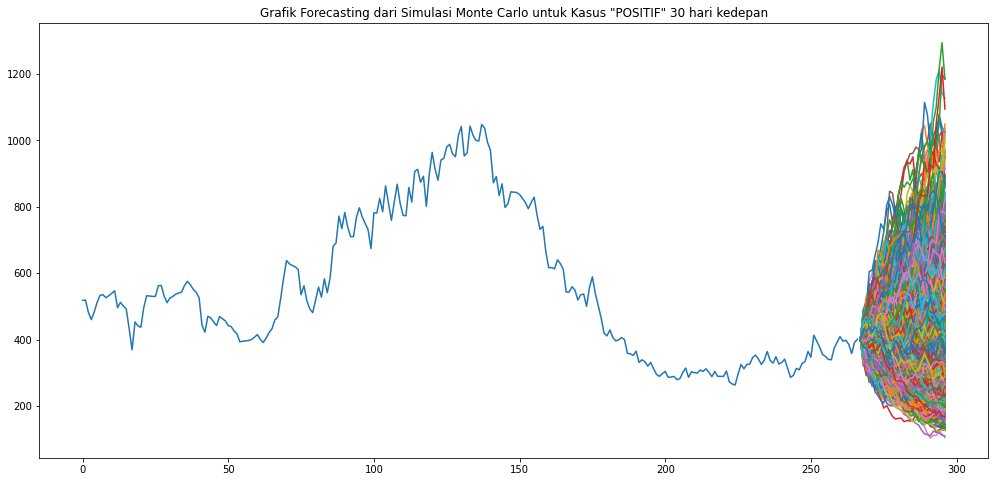

In [42]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "POSITIF" 30 hari kedepan')
plt.show()

In [43]:
#Let us first create en empty matrix such as daily returns
pos_list = np.zeros_like(daily_returns)
pos_list[0] = S0
pos_list

array([[401., 401., 401., ..., 401., 401., 401.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [44]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    pos_list[t] = pos_list[t - 1] * daily_returns[t]

In [45]:
positif_new = np.zeros([t_intervals,1])
positif_new

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [46]:
for t in range(0, t_intervals):
  positif_new[t] = sum(pos_list[t,:])/iterations
positif_new = pd.DataFrame(positif_new)
positif_new.head()

,0
0,401.000000
1,400.565785
2,400.202325
3,400.129240
4,399.599999


In [47]:
positif = data.POSITIF
positif = pd.DataFrame(positif)
frames = [positif, positif_new]
monte_carlo_forecast = pd.concat(frames)

In [48]:
monte_carlo_forecast.head()

,POSITIF,0
0,518.0,NaN
1,519.0,NaN
2,482.0,NaN
3,460.0,NaN
4,483.0,NaN


In [49]:
monte_carlo_forecast.tail()

,POSITIF,0
25,NaN,391.615068
26,NaN,391.271798
27,NaN,390.992529
28,NaN,390.866116
29,NaN,390.336841


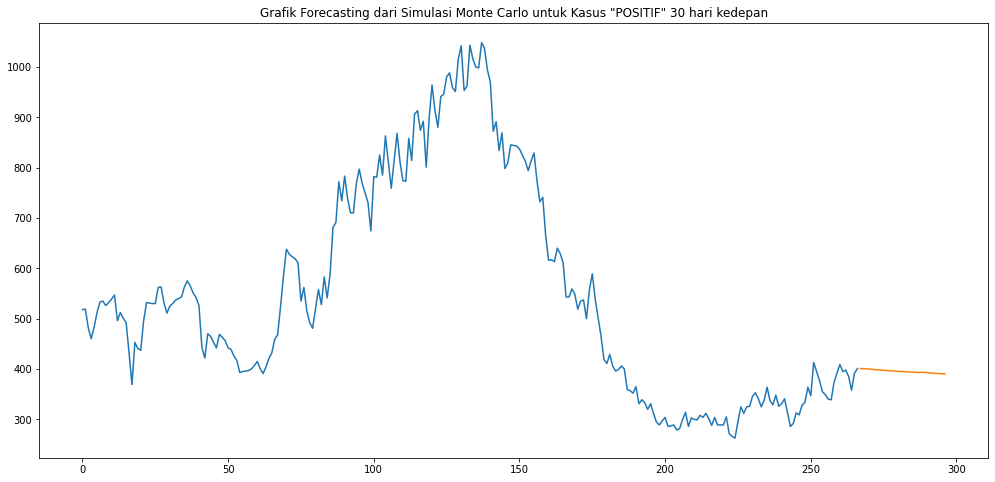

In [50]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "POSITIF" 30 hari kedepan')
plt.show()

2. Prediksi Jumlah Kasus "SUSPEK"

In [51]:
from scipy.stats import norm
log_returns = np.log(1 + data.SUSPEK.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return

t_intervals = 30 #I just wanted to forecast 250 time points
iterations = 10000 #I wanted to have 50 different forecast

import random
np.random.seed(10)
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital).

In [52]:
S0 = data.SUSPEK.iloc[-1]
S0

83

In [53]:
#Let us first create en empty matrix such as daily returns
sus_list = np.zeros_like(daily_returns)
sus_list[0] = S0
sus_list

array([[83., 83., 83., ..., 83., 83., 83.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [54]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    sus_list[t] = sus_list[t - 1] * daily_returns[t]
sus_list = pd.DataFrame(sus_list)
sus_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
1,80.058266,102.407562,81.453041,65.149572,75.887651,103.599911,86.100902,89.645909,73.625438,85.493341,78.900962,73.821058,78.169030,97.003579,91.105750,73.318343,80.047468,72.993411,73.208428,92.195262,72.583349,72.913034,71.430553,90.710933,82.610801,64.320075,81.162269,80.855544,74.068873,91.828811,89.306553,92.356058,88.527654,64.427858,77.675473,66.744690,92.688333,72.233975,82.950008,90.848518,...,87.999729,84.216562,82.827871,82.221615,71.710048,106.953940,73.678568,81.826505,77.111695,85.237011,80.155974,76.513260,97.099358,79.258009,77.723617,78.620117,84.893628,87.576042,72.234890,72.035166,76.454973,83.854923,80.747635,89.315553,76.181282,86.846485,87.021974,79.112014,76.743467,97.360947,75.699508,73.060334,86.357091,83.426468,92.032329,80.201031,85.315118,100.136948,111.252361,97.679864
2,86.732803,119.593927,97.144968,78.425925,77.029872,77.824570,86.849220,79.128645,81.624925,79.341008,91.978571,72.704704,63.126969,82.613791,111.522340,83.228643,63.773811,63.235156,73.420702,75.659293,71.354811,71.967340,70.652448,95.372101,58.758767,58.334953,75.466647,74.094953,83.361122,92.196346,102.914246,87.709536,88.114850,59.539365,62.633066,61.251248,75.178610,68.131601,80.218636,105.650758,...,91.860003,71.990379,76.219219,67.640434,79.117443,116.350921,74.193167,85.395919,74.231922,75.871830,79.503511,68.646432,102.488261,66.636748,69.618722,65.319555,79.311887,91.390985,68.238794,69.941696,82.789112,80.138589,80.143306,95.293172,82.893250,97.358897,82.344957,84.897154,82.801843,113.499621,103.797058,80.871079,85.541089,83.631492,84.430978,79.074075,94.766163,106.686974,108.999208,92.878057
3,81.797580,108.084744,93.617942,71.152179,90.760280,66.844195,67.876101,100.449349,84.948966,78.684241,89.965516,65.633499,72.264220,77.030687,98.837671,82.963748,78.633662,56.882299,66.931818,91.821757,70.547373,71.967789,85.285357,86.720105,58.680127,62.970939,73.797280,78.987481,98.196802,94.867063,128.226717,80.325471,101.105782,64.304468,64.373031,59.587876,77.910054,69.759715,78.388321,88.721782,...,90.407992,53.672402,70.861025,67.205792,68.279784,89.829753,80.150571,105.804697,58.817847,71.395173,74.951500,72.716379,88.326442,57.469049,64.229369,62.633556,88.068359,92.309874,70.072759,57.947813,79.944795,77.683859,69.444746,71.325273,78.730530,112.307963,63.909081,67.268009,79.403673,91.457566,117.013084,113.790209,68.773067,91.373001,88.794794,87.579149,125.478539,88.496188,107.818795,98.834634
4,86.600205,119.793255,107.228197,74.858752,96.633511,54.471982,50.423525,112.325016,88.187775,65.652981,84.596872,63.674198,73.078581,86.238946,98.761332,62.938562,89.965061,50.312890,55.026577,83.282880,76.742535,66.799022,87.052217,90.385783,55.489168,47.035795,84.563062,89.156104,103.563081,82.943539,103.837108,77.323343,109.077268,56.259739,64.227411,58.365280,93.306522,70.441163,66.529935,83.241250,...,87.162341,59.297831,64.4

In [55]:
suspek = data.SUSPEK
suspek = pd.DataFrame(suspek)
frames = [suspek, sus_list]
monte_carlo_forecast = pd.concat(frames)

In [56]:
monte_carlo_forecast.head()

,SUSPEK,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,465.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
monte_carlo_forecast.tail()

,SUSPEK,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
25,NaN,90.327761,62.358596,103.828036,67.881086,94.023891,41.442116,10.486512,163.237189,72.397425,47.609970,62.837803,156.778951,24.905731,67.306005,44.087845,55.031778,41.800464,24.894357,32.100219,67.620898,84.785128,58.986186,54.783682,46.650575,28.926030,24.197343,139.617045,67.308813,69.423749,61.731570,74.057862,26.945000,66.990520,53.242418,26.070270,51.154953,72.354256,354.495061,42.827446,...,39.479173,23.249812,23.336220,52.611351,111.778319,142.809249,76.765212,30.622491,29.784532,123.852744,108.527354,15.846015,54.998252,23.396403,23.703014,29.210170,78.738816,133.812421,93.844516,42.366982,75.367395,45.631076,39.010640,61.370024,48.694172,228.179827,30.213450,86.202591,102.329636,60.071537,36.144166,80.527934,11.867973,127.027675,46.112109,44.787571,69.436705,30.531449,139.023789,108.127433
26,NaN,131.960084,45.173451,114.591979,64.751414,111.982297,35.153687,9.949372,153.788953,59.034411,59.907742,67.593428,142.019674,20.879313,60.681189,34.468664,55.746198,43.685487,21.128211,35.971398,71.167991,96.093851,61.963141,64.501496,48.216644,33.391657,21.111656,160.721372,70.517996,80.382397,59.968448,73.706878,28.285571,75.715292,49.435578,19.359457,53.494916,82.446619,323.662294,47.941111,...,44.882960,23.792074,22.251155,56.908803,108.752878,143.664790,68.923573,32.691730,33.553013,109.861971,116.398274,15.891321,50.043911,22.388697,19.915260,25.210959,93.216577,159.030990,96.139903,39.300789,76.603050,49.703584,42.989309,53.906970,48.217263,216.039809,31.965049,74.847066,95.246686,51.552073,40.200271,91.663887,10.143400,119.623843,45.416642,45.636116,67.468229,34.492724,126.028107,96.688240
27,NaN,129.684641,45.724682,123.052551,58.702438,119.460386,32.355654,8.748281,146.181161,65.745467,64.961447,69.175141,141.285209,24.733113,61.538037,35.397859,49.635902,44.738645,22.870159,31.897075,72.805752,76.600972,66.822377,72.307172,40.192819,28.639632,21.812822,148.867364,76.382413,80.481240,69.122699,57.574234,28.908060,75.240399,48.952940,17.447460,59.035733,97.554450,254.524791,58.803121,...,43.045182,27.207478,24.733227,41.596165,105.669234,138.034507,74.259223,34.681764,37.284119,102.885918,103.500105,15.803249,42.925485,22.057743,20.369643,28.817681,119.868275,158.063649,101.447334,46.849218,77.890656,48.013077,45.785685,50.635135,49.090441,210.694613,29.778051,72.276516,84.507149,73.767757,40.406721,93.594591,11.762252,131.920847,45.491608,44.150169,67.242846,35.780487,97.893201,86.516551
28,NaN,124.839860,38.222766,123.536124,67.786790,112.294573,30.272141,9.191411,147.885032,58.329274,64.324735,59.498293,123.081030,27.223816,57.917346,44.458740,61.511145,51.153447,25.219167,34.881867,77.762237,80.465348,52.212635,73.131422,54.075751,26.067896,22.864448,147.548654,69.830712,83.714668,72.817779,60.238508,21.805628,81.537813,55.325952,16.501899,55.335039,96.921889,276.608086,55.578597,...,42.782692,21.917496,19.879789,42.062001,103.615136,127.890778,68.967454,37.146231,39.343266,95.199141,104.697644,14.296368,40.436301,20.618193,19.047679,32.718019,103.235234,127.485960,95.687551,40.520685,78.292912,70.929483,45.985760,48.235966,53.672840,159.855622,28.484611,70.942884,92.074090,69.782251,45.253740,80.327714,9.787573,143.747892,45.774741,45.373379,50.934511,30.267953,86.173200,93.903171
29,NaN,134.441006,42.513572,143.250841,58.005667,105.990556,31.136638,10.644299,112.076095,49.750406,72.898024,58.879310,125.526409,27.849809,59.273411,38.907144,53.064612,52.139062,25.338489,40.009221,78.200544,69.921714,53.535027,63.040164,50.680791,22.846385,24.290704,162.716717,52.226021,77.927283,69.347314,62.096788,26.078331,88.454355,43.578549,17.844794,54.772641,100.662477,293.252940,55.912416,...,40.554725,19

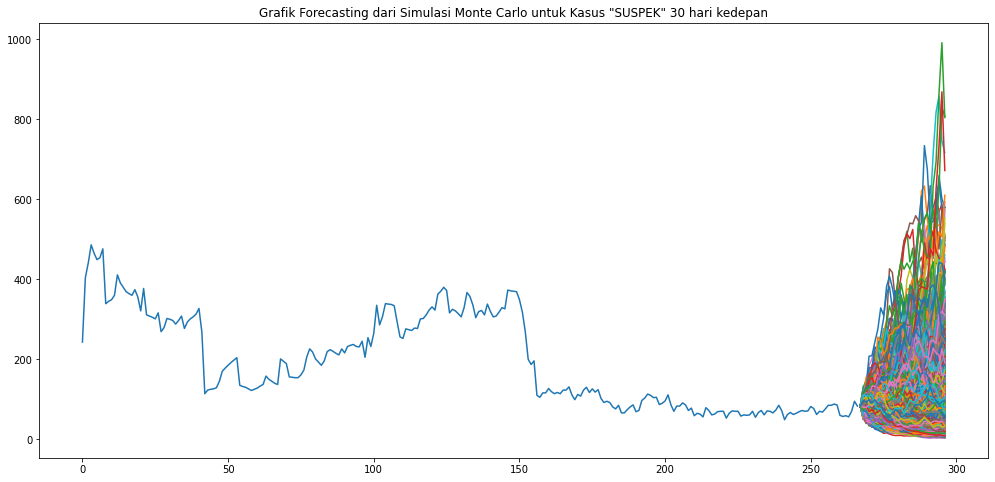

In [58]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "SUSPEK" 30 hari kedepan')
plt.show()

In [59]:
#Let us first create en empty matrix such as daily returns
sus_list = np.zeros_like(daily_returns)
sus_list[0] = S0
sus_list

array([[83., 83., 83., ..., 83., 83., 83.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [60]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    sus_list[t] = sus_list[t - 1] * daily_returns[t]

In [61]:
suspek_new = np.zeros([t_intervals,1])
suspek_new

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [62]:
for t in range(0, t_intervals):
  suspek_new[t] = sum(sus_list[t,:])/iterations
suspek_new = pd.DataFrame(suspek_new)
suspek_new.head()

,0
0,83.000000
1,82.651903
2,82.309182
3,82.127929
4,81.736127


In [63]:
suspek = data.SUSPEK
suspek = pd.DataFrame(suspek)
frames = [suspek, suspek_new]
monte_carlo_forecast = pd.concat(frames)

In [64]:
monte_carlo_forecast.head()

,SUSPEK,0
0,243.0,NaN
1,404.0,NaN
2,441.0,NaN
3,486.0,NaN
4,465.0,NaN


In [65]:
monte_carlo_forecast.tail()

,SUSPEK,0
25,NaN,75.053577
26,NaN,74.766968
27,NaN,74.502356
28,NaN,74.342209
29,NaN,73.950211


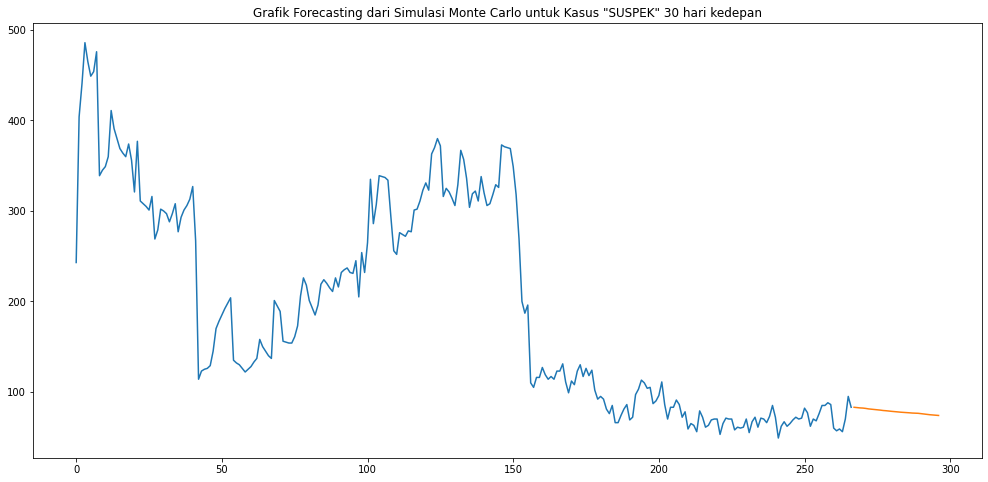

In [66]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "SUSPEK" 30 hari kedepan')
plt.show()

3. Prediksi Jumlah Kasus "PROBABLE"

In [75]:
from scipy.stats import norm
log_returns = np.log(1 + data.PROBABLE.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return

t_intervals = 30 #I just wanted to forecast 250 time points
iterations = 10000 #I wanted to have 50 different forecast
np.random.rand
norm.ppf()
import random
np.random.seed(10)
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital).

In [76]:
S0 = data.PROBABLE.iloc[-1]
S0

22

In [77]:
#Let us first create en empty matrix such as daily returns
prob_list = np.zeros_like(daily_returns)
prob_list[0] = S0
prob_list

array([[22., 22., 22., ..., 22., 22., 22.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [78]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    prob_list[t] = prob_list[t - 1] * daily_returns[t]
prob_list = pd.DataFrame(prob_list)
prob_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
1,21.009107,28.708263,21.474361,16.177593,19.630970,29.132813,23.040052,24.249633,18.891830,22.834070,20.624712,18.955508,20.382381,26.800875,24.751512,18.791957,21.005514,18.686404,18.756237,25.127485,18.553377,18.660313,18.180485,24.615563,21.862181,15.916829,21.377191,21.274791,19.036241,25.000895,24.133279,25.183074,23.866666,15.950662,20.219315,16.681540,25.298028,18.440197,21.976084,24.662920,...,23.686318,22.402484,21.935057,21.731650,18.270745,30.334057,18.909120,21.599301,20.033388,22.747284,21.041629,19.836430,26.834438,20.743144,20.235209,20.531657,22.631134,23.541789,18.440493,18.375858,19.817268,22.280557,21.238790,24.136363,19.727347,23.293360,23.353067,20.694700,19.912147,26.926150,19.569269,18.708133,23.127025,22.136286,25.071183,21.056630,22.773722,27.903454,31.888336,27.038051
2,23.247175,34.939080,26.841736,20.460743,19.999960,20.261987,23.286753,20.693519,21.524877,20.763974,25.044506,18.586708,15.538311,21.856110,31.976154,22.062599,15.740499,15.572089,18.819142,19.549759,18.150166,18.347980,17.923900,26.222049,14.187647,14.057998,19.486653,19.038579,22.107144,25.119728,28.879165,23.579674,23.717944,14.427094,15.384301,14.955154,19.392381,17.116803,21.055676,29.856441,...,25.003571,18.355429,19.733418,16.960468,20.689804,33.741974,19.070588,22.793700,19.083222,19.619429,20.817921,17.280995,28.727657,16.641948,17.591983,16.225888,20.754310,24.841785,17.150963,17.695545,21.914947,21.029035,21.030605,26.194531,21.949911,26.916719,21.765954,22.625003,21.919221,32.696820,29.193687,21.273089,22.842850,22.198112,22.467568,20.675423,26.010954,30.228284,31.061509,25.355508
3,21.575649,30.721461,25.603646,18.078974,24.616608,16.702271,17.029929,27.995769,22.635188,20.539597,24.343563,16.319568,18.438051,19.993757,27.427362,21.966477,20.522855,13.611136,16.730041,24.982284,17.884313,18.342188,22.748918,23.235338,14.158988,15.484610,18.935505,20.640033,27.202028,26.037652,38.155523,21.084420,28.227984,15.901635,15.923140,14.437329,20.283650,17.631470,20.441685,23.917571,...,24.495498,12.644556,17.985209,16.816934,17.158475,24.296985,21.026216,29.901941,14.201143,18.157309,19.311867,18.584478,23.782496,13.789434,15.878088,15.379475,23.694406,25.150820,17.731868,13.935279,20.957782,20.208998,17.530576,18.134768,20.554922,32.251646,15.777745,16.836680,20.778048,24.856692,33.974686,32.792403,17.315829,24.827549,23.942534,23.527615,37.121472,23.840473,30.625630,27.426294
4,23.187100,34.990290,30.403201,19.275328,26.645395,12.879748,11.678128,32.247419,23.727476,16.320429,22.508992,15.699162,18.695898,23.064503,27.391634,15.469507,24.335530,11.645643,13.046272,22.066546,19.892518,16.682558,23.340687,24.479944,13.185515,10.692241,22.497584,24.058362,29.091421,21.952586,29.189073,20.083635,31.069605,13.418153,15.872337,14.058165,25.487434,17.844398,16.597380,22.052559,...,23.378138,14.343626,15.928987,14.965739,18.614778,24.89

In [79]:
probable = data.PROBABLE
probable = pd.DataFrame(probable)
frames = [probable, prob_list]
monte_carlo_forecast = pd.concat(frames)

In [80]:
monte_carlo_forecast.head()

,PROBABLE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
monte_carlo_forecast.tail()

,PROBABLE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
25,NaN,24.294341,15.185400,28.988155,16.910682,25.561873,9.044514,1.583187,51.454116,18.350044,10.784490,15.333540,48.886340,4.741770,16.729205,9.782944,12.959458,9.143809,4.739024,6.541887,16.828523,22.419643,14.151588,12.885412,10.509642,5.732681,4.571391,42.202329,16.730090,17.399528,14.992023,18.885394,5.239440,16.629824,12.427432,5.024684,11.812813,18.336170,137.570672,9.429636,...,8.504723,4.345583,4.366074,12.240931,31.831435,43.429728,19.765184,6.162358,5.949301,36.253536,30.661998,2.672390,12.949447,4.380359,4.453285,5.804188,20.411815,39.989775,25.500046,9.301251,19.309886,10.219232,8.376928,14.880761,11.096885,78.683676,6.058158,22.896034,28.458657,14.482616,7.604168,21.001772,1.852210,37.436128,10.356042,9.980265,17.403646,6.139134,41.975046,30.518781
26,NaN,39.276352,10.086173,32.840333,15.922961,31.894793,7.338509,1.480583,47.691591,14.161678,14.427885,16.814412,43.111491,3.790358,14.664518,7.157635,13.168920,9.666730,3.847750,7.555657,17.949958,26.269126,15.058505,15.845064,10.955515,6.875212,3.843927,50.434208,17.742309,20.946868,14.446429,18.765886,5.570392,19.416708,11.307927,3.443937,12.498175,21.631368,122.537768,10.876182,...,10.003991,4.473067,4.108919,13.518180,30.732876,43.745781,17.235129,6.692970,6.917370,31.130889,33.498188,2.681215,11.484683,4.141155,3.569805,4.814028,25.275676,49.762475,26.285092,8.453283,19.705871,11.385727,9.471788,12.620386,10.955693,73.389432,6.504867,19.134786,25.975781,11.925369,8.699385,24.742962,1.517295,34.679749,10.155082,10.217356,16.774925,7.163972,37.050953,26.475357
27,NaN,38.407041,10.239195,35.933488,14.056212,34.608463,6.603698,1.257292,44.705290,16.228342,15.983316,17.309342,42.815086,4.697090,14.922781,7.400814,11.362391,9.959992,4.253038,6.485231,18.469434,19.698817,16.566182,18.309184,8.694525,5.657134,4.005246,45.749637,19.627567,20.972750,17.292702,13.714509,5.724459,19.256165,11.164493,3.017472,14.157497,26.767845,90.319482,14.086792,...,9.484333,5.300818,4.697118,9.081291,29.622418,41.569704,18.938274,7.211465,7.904467,28.636451,28.853414,2.661523,9.450900,4.062363,3.672220,5.701772,34.758388,49.362949,28.129628,10.559589,20.120357,10.893365,10.256521,11.653248,11.204277,71.071408,5.943811,18.299340,22.312020,18.779466,8.753247,25.397510,1.830126,39.248838,10.173051,9.794144,16.698487,7.502411,26.885775,22.986954
28,NaN,36.584817,8.155038,36.100977,16.864515,31.986917,6.067193,1.338165,45.352453,13.938482,15.779801,14.293692,35.932404,5.303138,13.813769,9.877837,14.909686,11.800908,4.812900,7.261921,20.071801,20.960713,12.111641,18.568257,12.662318,5.019228,4.250315,45.221672,17.511967,22.039876,18.467326,14.519581,4.002275,21.315631,13.034712,2.810706,13.037427,26.539334,100.338050,13.110242,...,9.408003,4.028332,3.559439,9.207478,28.884738,37.722353,17.237884,7.864868,8.459394,25.942541,29.267966,2.343141,8.758539,3.727931,3.371570,6.695461,28.750499,37.570994,26.111444,8.781724,20.245669,17.862139,10.310055,10.953990,12.542793,50.057523,5.616511,17.866419,24.867364,17.496556,10.102371,20.915257,1.449177,43.749546,10.250095,10.136253,11.736893,6.066128,22.863925,25.495494
29,NaN,40.176108,9.329996,43.543697,13.836010,29.717455,6.285721,1.611370,31.897692,11.388268,18.487154,14.100813,36.828233,5.456488,14.220612,8.337953,12.358815,12.086090,4.840229,8.638597,20.208841,17.535237,12.497920,15.376271,11.659026,4.244683,4.587827,51.179855,12.111658,20.119329,17.352759,15.085053,5.020151,23.626537,9.627379,3.102873,12.865453,27.835905,108.020925,13.205907,...,8.788236,3.361597,3.380888,12.123897,29.351508,30.400556,16.965367,8.154599,8.474448,19.284735,39.611539,2.307483,6.140763,5.178531,4.963115,5.033459,26.991267,33.655724,29.723211,14.483548

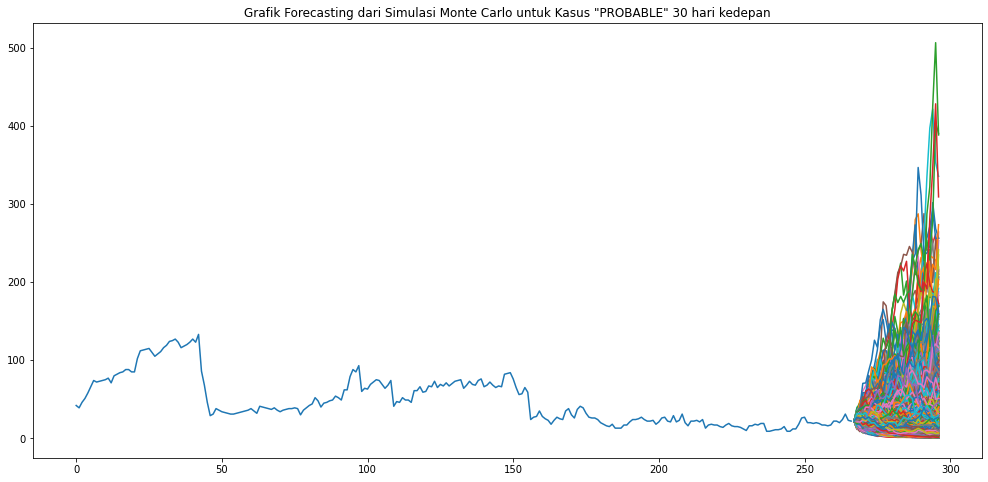

In [83]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "PROBABLE" 30 hari kedepan')
plt.show()

In [84]:
#Let us first create en empty matrix such as daily returns
prob_list = np.zeros_like(daily_returns)
prob_list[0] = S0
prob_list

array([[22., 22., 22., ..., 22., 22., 22.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [85]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    prob_list[t] = prob_list[t - 1] * daily_returns[t]

In [88]:
probable_new = np.zeros([t_intervals,1])
probable_new

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [89]:
for t in range(0, t_intervals):
  probable_new[t] = sum(prob_list[t,:])/iterations
probable_new = pd.DataFrame(probable_new)
probable_new.head()

,0
0,22.000000
1,21.943354
2,21.883511
3,21.882203
4,21.809437


In [90]:
probable = data.PROBABLE
probable = pd.DataFrame(probable)
frames = [probable, probable_new]
monte_carlo_forecast = pd.concat(frames)

In [91]:
monte_carlo_forecast.head()

,PROBABLE,0
0,42.0,NaN
1,39.0,NaN
2,46.0,NaN
3,51.0,NaN
4,58.0,NaN


In [92]:
monte_carlo_forecast.tail()

,PROBABLE,0
25,NaN,20.693525
26,NaN,20.651811
27,NaN,20.612761
28,NaN,20.624870
29,NaN,20.533972


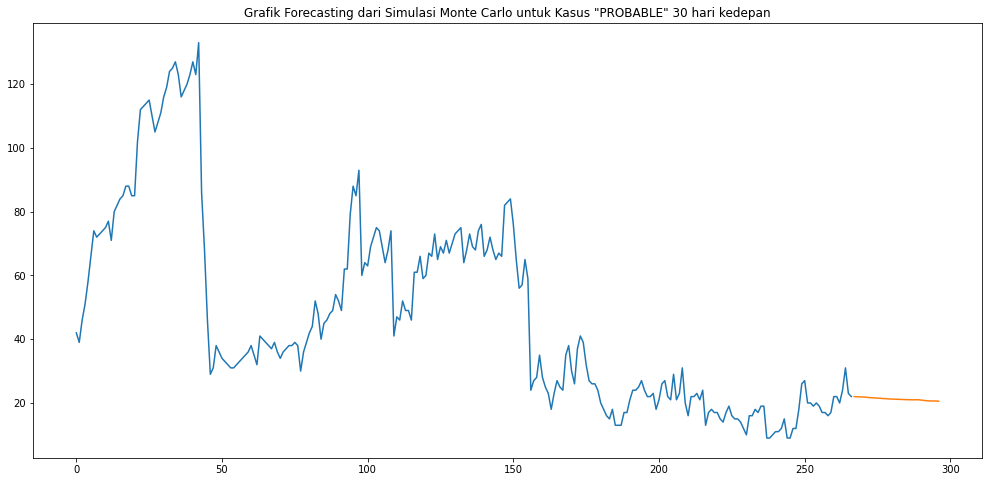

In [94]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "PROBABLE" 30 hari kedepan')
plt.show()

4. Prediksi Jumlah Kasus "MENINGGAL"

In [96]:
from scipy.stats import norm
log_returns = np.log(1 + data.MENINGGAL.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return

t_intervals = 30 #I just wanted to forecast 250 time points
iterations = 10000 #I wanted to have 10 different forecast

import random
np.random.seed(10)
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital).

In [97]:
S0 = data.MENINGGAL.iloc[-1]
S0

2906

In [98]:
#Let us first create en empty matrix such as daily returns
dead_list = np.zeros_like(daily_returns)
dead_list[0] = S0
dead_list

array([[2906., 2906., 2906., ..., 2906., 2906., 2906.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [99]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    dead_list[t] = dead_list[t - 1] * daily_returns[t]
dead_list = pd.DataFrame(dead_list)
dead_list['meninggal'] = dead_list[0]
dead_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,meninggal
0,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,...,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000
1,2920.487672,2944.301421,2922.151968,2900.704215,2915.338454,2945.425845,2927.505614,2931.404267,2912.429754,2926.821898,2919.085311,2912.684667,2918.188089,2939.041197,2932.966564,2912.028253,2920.474678,2911.601656,2911.884152,2934.116845,2911.060666,2911.495848,2909.523809,2932.546439,2923.512648,2899.478458,2921.807294,2921.442414,2913.006660,2933.731429,2931.037571,2934.285495,2930.190798,2899.638593,2917.578475,2903.019497,2934.633103,2910.597403,2923.907816,2932.693043,...,2925.369637,2923.765710,2923.057318,2909.898610,2948.522950,2912.499052,2922.592921,2916.877529,2926.532028,2920.605170,2916.128050,2939.136870,2919.520072,2917.638105,2918.741998,2926.142390,2929.146431,2910.598620,2910.332818,2916.054749,2924.954423,2921.313727,2931.047314,2915.709834,2928.338304,2928.533290,2919.342530,2916.417029,2939.397706,2915.099763,2911.689668,2927.792517,2924.460249,2933.945662,2920.659308,2926.620444,2942.124704,2952.357585,2939.714789,2920.487672
2,2946.315032,2977.702893,2957.353466,2936.547146,2934.807927,2935.801672,2946.445390,2937.411307,2940.422192,2937.670997,2952.027462,2929.219277,2915.602856,2941.590353,2970.847609,2942.309887,2916.583425,2915.767535,2930.166279,2933.070535,2927.409074,2928.234542,2926.454067,2955.557369,2908.714903,2908.020467,2932.823893,2931.049936,2942.464248,2952.257741,2962.986459,2947.403529,2947.851784,2909.981362,2914.847567,2912.703454,2932.453988,2922.949168,2938.737135,2965.552348,...,2928.265457,2933.783963,2922.251691,2937.397589,2975.003982,2931.178004,2944.805799,2931.228493,2933.341937,2937.869263,2923.675047,2962.581111,2920.811057,2925.031672,2918.888260,2937.635426,2951.403498,2923.100740,2925.478262,2941.796049,2938.640363,2938.646068,2955.476657,2941.918031,2957.568051,2941.274119,2944.236875,2941.810970,2972.570272,2963.821364,2939.522434,2944.970785,2942.778541,2943.702194,2937.344467,2954.936080,2966.507212,2968.605980,2952.975209,2946.315032
3,2958.807135,2986.129010,2972.009281,2945.231074,2968.971870,2939.169870,2940.655427,2978.921721,2962.498808,2955.022420,2968.110671,2937.398384,2946.738031,2952.952981,2977.332840,2960.189015,2954.959746,2923.566115,2939.296872,2970.110771,2944.401897,2946.338533,2962.885019,2964.515880,2926.568330,2933.388691,2948.779161,2955.397359,2976.694064,2973.308907,3003.007932,2957.035260,2979.561814,2935.416994,2935.520177,2928.050557,2954.058807,2943.311666,2954.655182,2966.748096,...,2917.970186,2944.832763,2939.692941,2941.230643,2967.962824,2956.822661,2984.029750,2926.794628,2945.562297,2950.289020,2947.344360,2966.311110,2924.555902,2935.303853,2932.868946,2966.024818,2970.630225,2943.746382,2925.356312,2956.571957,2953.775519,2942.872368,2945.467129,2955.079744,2989.906

In [100]:
meninggal = data.MENINGGAL
meninggal = pd.DataFrame(meninggal)
frames = [meninggal, dead_list]
monte_carlo_forecast = pd.concat(frames)

In [101]:
monte_carlo_forecast.head()

,MENINGGAL,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,meninggal
0,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
monte_carlo_forecast.tail()

,MENINGGAL,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,meninggal
25,NaN,3399.577818,3358.280484,3415.232926,3367.693230,3404.077793,3313.322638,3166.490895,3466.585551,3374.855964,3328.520523,3359.128579,3461.972871,3258.137872,3366.748282,3320.093005,3344.463628,3314.263719,3258.088782,3285.523911,3367.266663,3392.484427,3352.127450,3343.965213,3326.286296,3274.259549,3255.038349,3448.759545,3366.752916,3370.190332,3357.161210,3377.381147,3266.606561,3366.226570,3340.819099,3263.052603,3336.414632,3374.789569,3556.401578,3316.918147,...,3250.752367,3251.150151,3339.505445,3423.554515,3451.332121,3381.383358,3280.420547,3277.419774,3435.157400,3420.223141,3209.903637,3344.396403,3251.426367,3252.823007,3275.315421,3384.215776,3443.932379,3403.863389,3315.735690,3379.334355,3323.862868,3306.721308,3356.510825,3330.993587,3505.094897,3278.965807,3394.340233,3413.595764,3354.144029,3298.407646,3386.724717,3179.442759,3438.026582,3325.012775,3321.817880,3370.211075,3280.098392,3448.275183,3419.806681,3399.577818
26,NaN,3463.631094,3343.300456,3447.545973,3383.241933,3444.927304,3315.759260,3180.546347,3481.164299,3372.942410,3374.576608,3388.038893,3472.034481,3259.268228,3376.004776,3313.607707,3366.572283,3339.608922,3260.542445,3318.275102,3393.802671,3427.584103,3378.333576,3382.810411,3350.497668,3310.139923,3260.458146,3486.230704,3392.775727,3407.459334,3374.689344,3397.728865,3292.070011,3400.743155,3353.257914,3251.153335,3361.997849,3410.310350,3567.664514,3349.864384,...,3273.338003,3266.116514,3368.865115,3441.603819,3473.353712,3390.217371,3307.827802,3310.666292,3442.755853,3449.324929,3230.052569,3354.610943,3266.780450,3254.190139,3279.598240,3424.148919,3485.015093,3427.638272,3327.977960,3402.050963,3353.855976,3337.839805,3362.848862,3350.499086,3520.410538,3305.376090,3399.449700,3426.583117,3357.897927,3330.462922,3422.252320,3182.573173,3452.436287,3343.892592,3344.424353,3387.831715,3313.683976,3458.380387,3428.281334,3463.631094
27,NaN,3483.045604,3365.315979,3477.019959,3393.163924,3473.623804,3327.143750,3186.658221,3496.829418,3405.869439,3404.521981,3411.586853,3492.902409,3297.791707,3398.447851,3337.020260,3374.439033,3362.896916,3289.284463,3325.577578,3417.347971,3423.080587,3407.695159,3416.573491,3351.032534,3313.782174,3284.152848,3498.930300,3422.757990,3428.664434,3411.501513,3390.992653,3314.802019,3421.057700,3372.897270,3260.052092,3393.797644,3450.491121,3561.380536,3393.355726,...,3308.179696,3297.792212,3354.828099,3459.597093,3490.221671,3419.576824,3334.771484,3342.739551,3456.552416,3457.231068,3249.426181,3358.310930,3285.362606,3276.746052,3314.459665,3474.014370,3505.855076,3454.947379,3368.014000,3424.966251,3370.741204,3365.463976,3376.658196,3373.209340,3539.249071,3318.045568,3416.525703,3434.189161,3418.827934,3351.619266,3445.778166,3217.927266,3485.010306,3364.748759,3361.428510,3408.400282,3338.203868,3450.885664,3436.852107,3483.045604
28,NaN,3500.180579,3366.165083,3498.968757,3430.383711,3487.974867,3340.371570,3211.589372,3519.793206,3413.423588,3424.457197,3415.658500,3498.542834,3328.697950,3412.625737,3382.987140,3419.408963,3398.675386,3320.310524,3356.025016,3445.953052,3449.839183,3400.973683,3438.981461,3404.909114,3323.937597,3309.592722,3519.528839,3433.746639,3454.346838,3438.493964,3417.051780,3304.420691,3451.346133,3407.477044,3274.183910,3407.495504,3471.078398,3593.246110,3407.989158,...,3304.978477,3294.357916,3376.809049,3478.732352,3502.969245,3432.338060,3362.994529,3369.374694,3469.025659,3479.925114,3258.726161,3372.421568,3298.323258,3289.714962,3348.943353,3478.310898,3502.602949,3469.611249,3372.653467,3446.726177,3435.515344,3386.757523,3392.098486,3404.069286,3528.841444,3333.672291,3435.

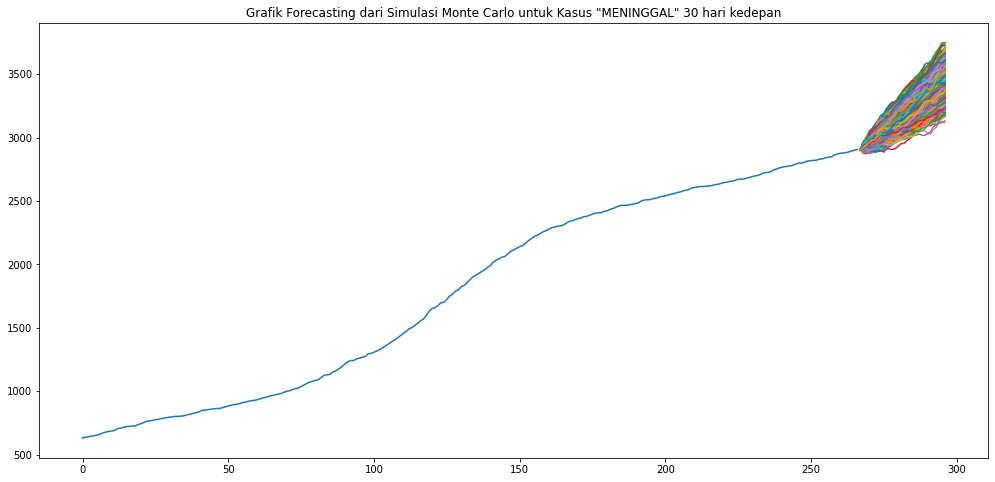

In [103]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "MENINGGAL" 30 hari kedepan')
plt.show()

In [104]:
#Let us first create en empty matrix such as daily returns
dead_list = np.zeros_like(daily_returns)
dead_list[0] = S0
dead_list

array([[2906., 2906., 2906., ..., 2906., 2906., 2906.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [105]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    dead_list[t] = dead_list[t - 1] * daily_returns[t]

In [106]:
meninggal_new = np.zeros([t_intervals,1])
meninggal_new

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [107]:
for t in range(0, t_intervals):
  meninggal_new[t] = sum(dead_list[t,:])/iterations
meninggal_new = pd.DataFrame(meninggal_new)
meninggal_new.head()

,0
0,2906.000000
1,2922.714933
2,2939.589600
3,2956.704359
4,2973.660409


In [108]:
meninggal = data.MENINGGAL
meninggal = pd.DataFrame(meninggal)
frames = [meninggal, meninggal_new]
monte_carlo_forecast = pd.concat(frames)

In [109]:
monte_carlo_forecast.head()

,MENINGGAL,0
0,630.0,NaN
1,636.0,NaN
2,640.0,NaN
3,644.0,NaN
4,648.0,NaN


In [110]:
monte_carlo_forecast.tail()

,MENINGGAL,0
25,NaN,3355.109300
26,NaN,3374.474120
27,NaN,3393.969353
28,NaN,3413.710855
29,NaN,3433.294822


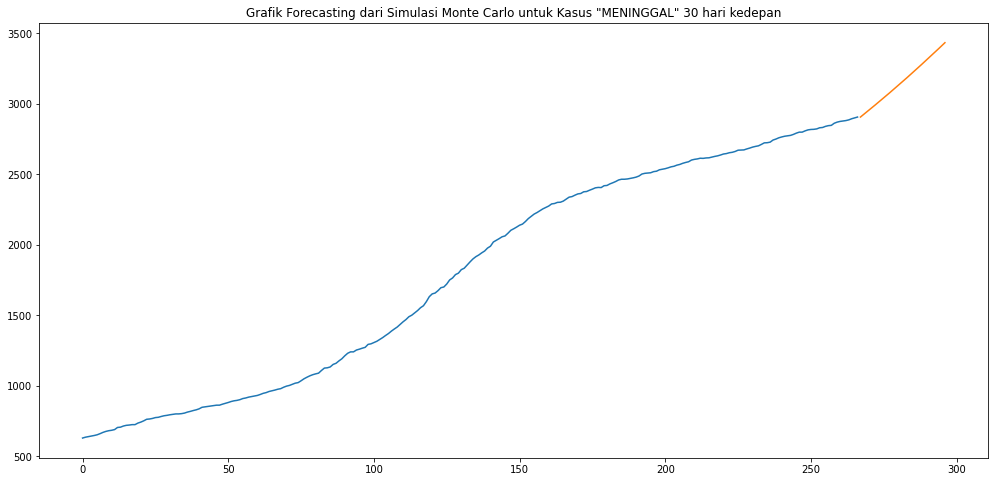

In [111]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "MENINGGAL" 30 hari kedepan')
plt.show()

4. Prediksi Jumlah Kasus "SEMBUH"

In [112]:
from scipy.stats import norm
log_returns = np.log(1 + data.SEMBUH.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return

t_intervals = 30 #I just wanted to forecast 250 time points
iterations = 10000 #I wanted to have 10 different forecast

import random
np.random.seed(10)
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
#daily_returns actually is some kind of a noise. When we multiply this with the t time price, we can obtain t+1 time price

Let's create a variable S0 (inital stock price) equals to the last  closing price .

In [113]:
S0 = data.SEMBUH.iloc[-1]
S0

34692

In [114]:
#Let us first create en empty matrix such as daily returns
sem_list = np.zeros_like(daily_returns)
sem_list[0] = S0
sem_list

array([[34692., 34692., 34692., ..., 34692., 34692., 34692.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [115]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    sem_list[t] = sem_list[t - 1] * daily_returns[t]
sem_list = pd.DataFrame(sem_list)
sem_list.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,...,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000,34692.000000
1,34913.306622,35261.250424,34937.603406,34624.726064,34838.153434,35277.694859,35015.781136,35072.731931,34795.713726,35005.795267,34892.836157,34799.432687,34879.740424,35184.339309,35095.558378,34789.856314,34913.116940,34783.632984,34787.754100,35112.366655,34775.741135,34782.089450,34753.323580,35089.419742,34957.470021,34606.860282,34932.571319,34927.244368,34804.130390,35106.734665,35067.374603,35114.831148,35055.004017,34609.194193,34870.843096,34658.476581,35119.910853,34768.983425,34963.240050,35091.561827,...,35046.559911,34984.586293,34961.165071,34950.821749,34758.790413,35322.996487,34796.724716,34944.041323,34860.613272,35001.561792,34915.021859,34849.675736,35185.737907,34899.182196,34871.713374,34887.825113,34995.871379,35039.747851,34769.001166,34765.123969,34848.606047,34978.522896,34925.365676,35067.516935,34843.572770,35027.943513,35030.791610,34896.590662,34853.892890,35189.550963,34834.670428,34784.916912,35019.971593,34971.306683,35109.865187,34915.812161,35002.853085,35229.420380,35379.100599,35194.186383
2,35300.804378,35760.565405,35462.369559,35157.947258,35132.521872,35147.048873,35302.711598,35170.581538,35214.607966,35174.378452,35384.398275,35050.844771,34851.987590,35231.691983,35660.059155,35242.215709,34866.301188,34854.391382,35064.682611,35107.126517,35024.396375,35036.456622,35010.444475,35436.071699,34751.472557,34741.341657,35103.521641,35077.595728,35244.473431,35387.768847,35544.868880,35316.730330,35323.289196,34769.949890,34840.963192,34809.670572,35098.115293,34959.249288,35189.967126,35582.459703,...,35382.559928,35036.908318,35117.554253,34949.063036,35170.380979,35720.990193,35079.467293,35278.724719,35080.205136,35111.093375,35177.277316,34969.850914,35538.931102,34928.025097,34989.666275,34899.949594,35173.858360,35375.265633,34961.462980,34996.189779,35234.700386,35188.552104,35188.635521,35434.890025,35236.484454,35465.511682,35227.067002,35270.402169,35234.918617,35685.310539,35557.099627,35201.450282,35281.138300,35249.070439,35262.580863,35169.604294,35426.975824,35596.450506,35627.205455,35398.270758
3,35493.815907,35894.446251,35687.301988,35295.048857,35642.769887,35206.372117,35228.102401,35788.684193,35547.900609,35438.383593,35630.145505,35180.462530,35317.102222,35408.080485,35765.376060,35514.059343,35437.465782,34978.271949,35208.229767,35659.466366,35282.915420,35311.255578,35553.559629,35577.457927,35022.138323,35121.829883,35346.976859,35443.874389,35756.006291,35706.359152,36142.353681,35467.862425,35798.074841,35151.486990,35152.995816,35043.799311,35424.272680,35266.963123,35433.005733,35610.173065,...,35637.187126,34896.53

In [116]:
sembuh = data.SEMBUH
sembuh = pd.DataFrame(sembuh)
frames = [sembuh, sem_list]
monte_carlo_forecast = pd.concat(frames)

In [117]:
monte_carlo_forecast.head()

,SEMBUH,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,4967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
monte_carlo_forecast.tail()

,SEMBUH,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
25,NaN,42318.581491,41691.682086,42556.669853,41834.419715,42386.993909,41011.151472,38802.865422,43339.348955,41943.096641,41240.976070,41704.539234,43268.940452,40178.604486,41820.086263,41113.505202,41482.319489,41025.375875,40177.865277,40591.378500,41827.949219,42210.782416,41598.423470,41474.770735,41207.175199,40421.504776,40131.935357,43067.365526,41820.156558,41872.301315,41674.714973,41981.422267,40306.166548,41812.173056,41427.126893,40252.625111,41360.443579,41942.089020,44714.414766,41065.502268,...,40931.075481,40067.418037,40073.405126,41407.236231,42683.325837,43106.597910,42042.178259,40514.400557,40469.149952,42860.037315,42632.613584,39453.464481,41481.301319,40077.562579,40098.585244,40437.422514,42085.185698,42993.767596,42383.733904,41047.626451,42011.071163,41170.517637,40911.397727,41664.856342,41278.396090,43927.966690,40492.462450,42238.980503,42531.760013,41628.983633,40785.831315,42123.288107,38996.761561,42903.755219,41187.910769,41139.589072,41872.616020,40509.542127,43059.979629,42626.274733
26,NaN,43306.645316,41476.575123,43061.186208,42082.443496,43021.249223,41059.735544,39024.461169,43574.489428,41926.058918,41950.865003,42155.314926,43434.981445,40207.135311,41972.545859,41027.203654,41829.389815,41420.659067,40226.330863,41097.781468,42242.903609,42756.919899,42007.903469,42075.889295,41585.631301,40974.779948,40225.060880,43651.941463,42227.295358,42450.567006,41952.576362,42302.586481,40701.807392,42348.417661,41627.469851,40084.926810,41759.995974,42493.942845,44900.246701,41576.033345,...,41465.799021,40419.182446,40310.321356,41864.179753,42970.572846,43455.134906,42188.416085,40939.833534,40982.736467,42988.137784,43088.320668,39767.469873,41647.981225,40320.327716,40130.652531,40513.596017,42704.598989,43633.355689,42757.745038,41244.573062,42368.305201,41636.535993,41393.866902,41772.904199,41585.652800,44175.110331,40902.783186,42328.750048,42741.672804,41697.818195,41282.182530,42675.717065,39054.830654,43135.785718,41485.545535,41493.601623,42152.167167,41028.356779,43226.491701,42767.540777
27,NaN,43615.731156,41822.300765,43523.609932,42245.287483,43471.704422,41243.754283,39127.252689,43826.593186,42438.529020,42418.027607,42525.538739,43766.499826,40799.884673,42325.632726,41393.304747,41960.787304,41785.593670,40671.398645,41220.048265,42613.246179,42700.552146,42466.309996,42601.453568,41605.647010,41041.589059,40593.930703,43858.748216,42695.638244,42785.623517,42524.239761,42212.280035,41057.013314,42669.740516,41937.377764,40230.459129,42254.922108,43118.452361,44816.520888,42248.203460,...,41720.700556,40956.875211,40799.892296,41663.198910,43257.444547,43725.486219,42647.187072,41359.245092,41479.951236,43210.962056,43221.322119,40070.394563,41716.021518,40612.191068,40482.163350,41051.835392,43477.673106,43964.765549,43186.461902,41863.247674,42729.277310,41904.644842,41824.546672,41994.486395,41942.115927,44476.671731,41106.076121,42600.725945,42869.824319,42635.782455,41614.542645,43046.546357,39596.588177,43645.775506,41813.693193,41763.314791,42477.040345,41411.233555,43124.472930,42910.420234
28,NaN,43890.449430,41847.164716,43871.894607,42824.081127,43703.626442,41455.938866,39512.687163,44190.945730,42565.681539,42733.754270,42599.715814,43865.373415,41279.097118,42553.532684,42102.672727,42656.840665,42341.212745,41152.121997,41693.284808,43061.540013,43120.847141,42376.178863,42955.182018,42436.064353,41207.022644,40989.971105,44186.892743,42875.351347,43189.658014,42947.746579,42620.935822,40911.764343,43143.849038,42475.148815,40455.093765,42475.429808,43445.244387,45319.638636,42482.944093,...,42037.557103,40920.197369,40759.681744,42008.8017

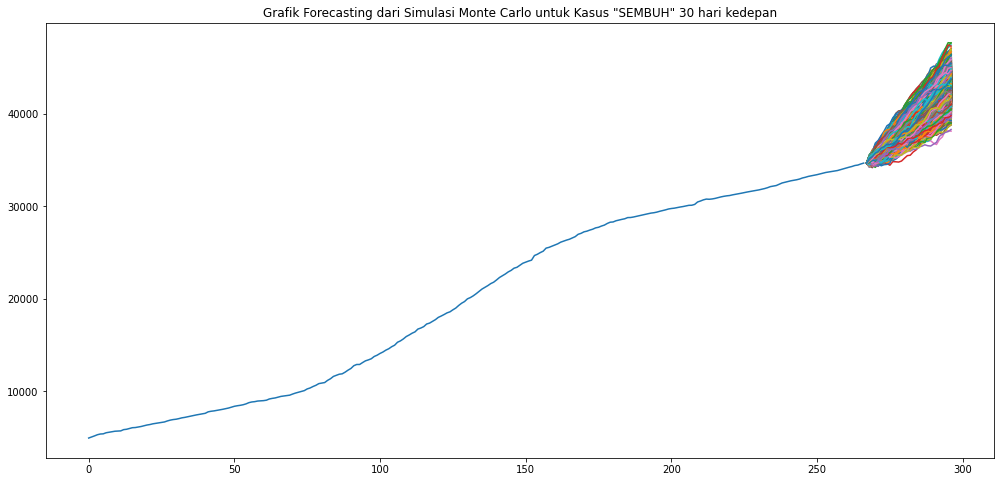

In [119]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "SEMBUH" 30 hari kedepan')
plt.show()

In [120]:
#Let us first create en empty matrix such as daily returns
sem_list = np.zeros_like(daily_returns)
sem_list[0] = S0
sem_list

array([[34692., 34692., 34692., ..., 34692., 34692., 34692.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.]])

In [121]:
# With a simple for loop, we are going to forecast the next 250 days
for t in range(1, t_intervals):
    sem_list[t] = sem_list[t - 1] * daily_returns[t]

In [122]:
sembuh_new = np.zeros([t_intervals,1])
sembuh_new

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [123]:
for t in range(0, t_intervals):
  sembuh_new[t] = sum(sem_list[t,:])/iterations
sembuh_new = pd.DataFrame(sembuh_new)
sembuh_new.head()

,0
0,34692.000000
1,34945.916044
2,35202.613947
3,35463.291532
4,35722.110589


In [124]:
sembuh = data.SEMBUH
sembuh = pd.DataFrame(sembuh)
frames = [sembuh, sembuh_new]
monte_carlo_forecast = pd.concat(frames)

In [125]:
monte_carlo_forecast.head()

,SEMBUH,0
0,4967.0,NaN
1,5077.0,NaN
2,5198.0,NaN
3,5325.0,NaN
4,5402.0,NaN


In [126]:
monte_carlo_forecast.tail()

,SEMBUH,0
25,NaN,41646.336546
26,NaN,41952.160904
27,NaN,42260.523965
28,NaN,42573.170984
29,NaN,42883.986383


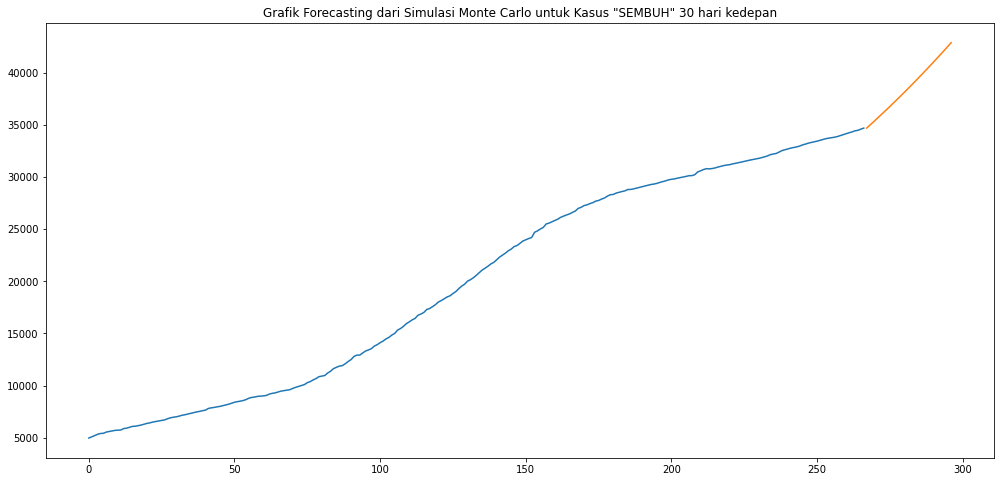

In [127]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.title('Grafik Forecasting dari Simulasi Monte Carlo untuk Kasus "SEMBUH" 30 hari kedepan')
plt.show()

**I'm intended to make an hybid model with monte carlo simulation, arma model and maybe LSTM.  
So, to be continued...
I'm open to any kind of suggestion:)**